In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
gan = np.load('../../experiments/runs/NLO_run_Feb262020_rayBest/train_mse.npy')
l2 = np.load('../../experiments/runs/NLO_run_Feb262020_L2Compare/train_mse.npy')
l1 = np.load('../../experiments/runs/NLO_run_Feb262020_L1Compare/train_mse.npy')
huber = np.load('../../experiments/runs/NLO_run_Feb262020_SmoothL1Compare/train_mse.npy')

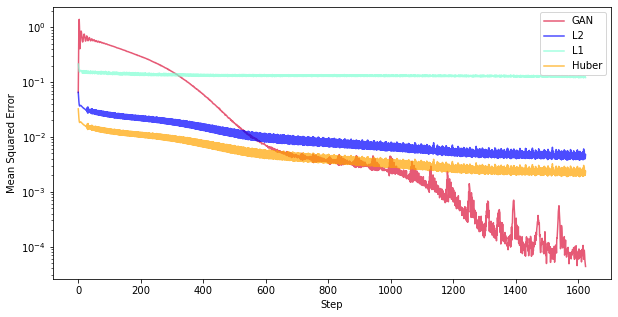

In [4]:
steps = np.arange(len(gan))
a = 0.7
plt.figure(figsize=(10,5))
plt.plot(steps, gan, label='GAN', color='crimson', alpha=a)
plt.plot(steps, l2, label='L2', color='blue', alpha=a)
plt.plot(steps, l1, label='L1', color='aquamarine', alpha=a)
plt.plot(steps, huber, label='Huber', color='orange', alpha=a)
plt.legend()
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error');

In [6]:
gan_reps = np.load('../../denn/nlo_rand_reps.npy')
l2_reps = np.load('../../denn/nlo_rand_reps_L2.npy')
l1_reps = np.load('../../denn/nlo_rand_reps_L1.npy')
huber_reps = np.load('../../denn/nlo_rand_reps_smoothL1.npy')

In [7]:
import denn.utils

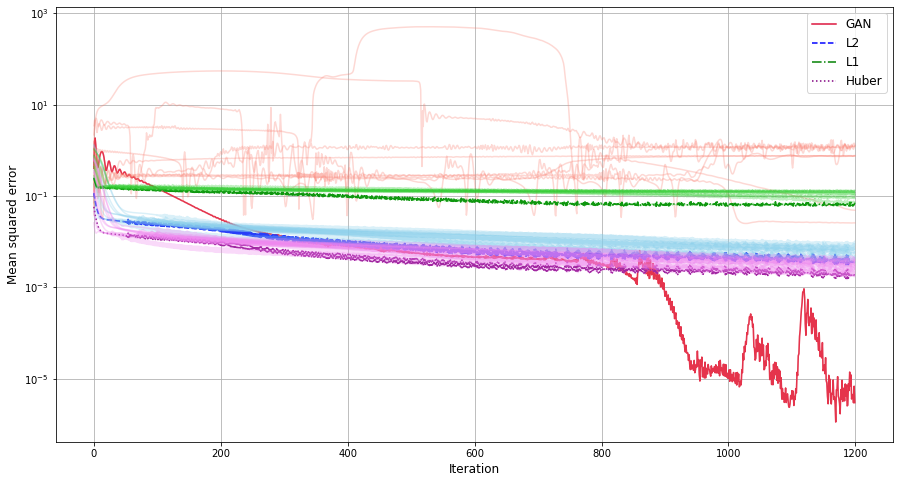

In [26]:
plt.figure(figsize=(15,8))
plt.yscale('log')

steps = np.arange(gan_reps.shape[1])

a=0.3

# gan
plt.plot(steps, gan_reps[np.argmin(gan_reps[:,-1]),:], 
         color='crimson', label='GAN', linestyle='solid')
for i in range(gan_reps.shape[0]):
    plt.plot(steps, gan_reps[i,:], alpha=a, color='salmon')
    
# L2
plt.plot(steps, l2_reps[np.argmin(l2_reps[:,-1]),:], 
         color='blue', label='L2', linestyle='dashed')
for i in range(l2_reps.shape[0]):
    plt.plot(steps, l2_reps[i, :], alpha=a, color='skyblue')
    
# L1
plt.plot(steps, l1_reps[np.argmin(l1_reps[:,-1]),:], 
         color='green', label='L1', linestyle='dashdot')
for i in range(l1_reps.shape[0]):
    plt.plot(steps, l1_reps[i, :], alpha=a, color='limegreen')
    
# Huber
plt.plot(steps, huber_reps[np.argmin(huber_reps[:,-1]),:], 
         color='purple', label='Huber', linestyle='dotted')
for i in range(huber_reps.shape[0]):
    plt.plot(steps, huber_reps[i, :], alpha=a, color='violet')


plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Mean squared error')
plt.grid()
plt.savefig('nlo_rand_reps.jpg');

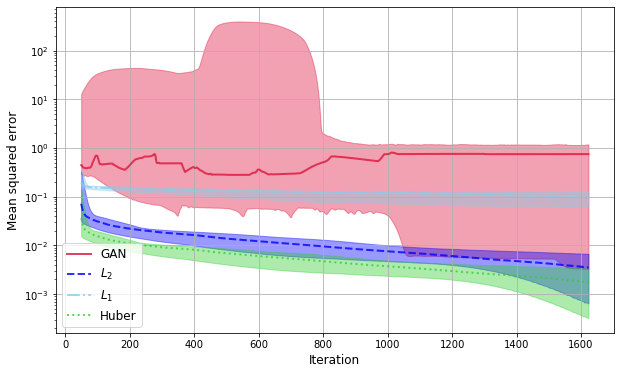

In [8]:
arrs = [gan_reps, l2_reps, l1_reps, huber_reps]
ut.plot_reps_results(arrs, fname=None, window=50, figsize=(10,6))

# Keeping Model Randomness Fixed, Varying Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
gan_reps = np.load('../../experiments/reps/nlo_gan_rand_reps_fixedmodels2.npy') # 2 uses n=1000 instead of n=8000
l2_reps = np.load('../../experiments/reps/nlo_l2_rand_reps_fixedmodels.npy')
l1_reps = np.load('../../experiments/reps/nlo_l1_rand_reps_fixedmodels.npy')
huber_reps = np.load('../../experiments/reps/nlo_huber_rand_reps_fixedmodels.npy')

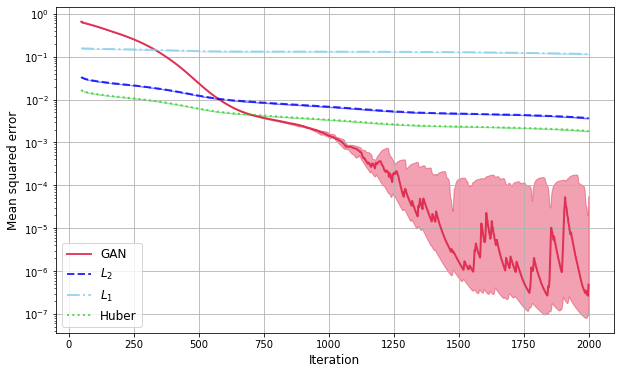

In [3]:
import denn.utils as ut
arrs = [gan_reps, l2_reps, l1_reps, huber_reps]
ut.plot_reps_results(arrs, fname='nlo_rand_reps.jpg', window=50, figsize=(10,6))

# RK4

In [60]:
from denn.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def nlo_deriv(t, xz):
    """ 
    $$ \ddot{x} + 2 \beta \dot{x} + \omega^{2} x + \phi x^{2} + \epsilon x^{3} = f(t) $$
    dxdt = z
    dzdt = -2 beta z - omega^2 x - phi x^2 - eps x^3
    
    x0 = 0
    self.omega = 1
    self.epsilon = .1
    self.beta = .1
    self.phi = 1
    
    n: 400
    t_max: 12.56
    dx_dt0: 0.5
    """
    b = 0.1
    e = 0.1
    o = 1
    p = 1
    
    x = xz[0]
    z = xz[1]
    rhs = np.array([z, -2*b*z - o*o*x - p*x*x - e*(x**3)])
    return rhs

In [62]:
t, sol = rk4(nlo_deriv, [0, 12.56], [0, 0.5], 1000)

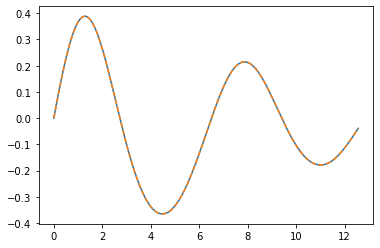

In [72]:
plt.plot(t, sol[:,0])
plt.plot(t, nlo_sol[:,0], '--')

In [68]:
nlo_sol.shape, sol.shape

((801, 1), (1001, 2))

In [69]:
from denn.problems import NonlinearOscillator

In [70]:
nlo = NonlinearOscillator(dx_dt0=0.5, n=1000)

In [71]:
nlo_sol = nlo.get_solution(t, atol=1e-32).numpy()

In [73]:
mse = np.mean((nlo_sol[:,0] - sol[:,0])**2)

In [74]:
mse

4.118457e-11

# Better hypers

includes Gamma / betas in hypertune

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_xx = np.load("/Users/dylanrandle/Downloads/NLO_run_gan_besthype_052120/val_mse.npy")
np.min(_xx)

1.4149087717435505e-12

In [3]:
folder = lambda i: f"/Users/dylanrandle/Downloads/NLO_run_gan_052220_seed{i}/val_mse.npy"

In [4]:
gan_reps = []
for i in range(5):
    gan_reps.append(np.load(folder(i)))
# gan_reps = np.vstack(gan_reps)

In [5]:
gan_reps[0] = gan_reps[0][:10000]

In [6]:
gan_reps = np.vstack(gan_reps)

In [7]:
# gan_reps = np.load('../../experiments/reps/nlo_gan_rand_reps_fixedmodels_extratune.npy')[:,:3000]
# gan_reps = np.load('/Users/dylanrandle/Downloads/nlo_gan_reps_small.npy')
# gan_reps = np.load('/Users/dylanrandle/Downloads/nlo_gan_reps_052220.npy')


l2_reps = np.load('../../experiments/reps/nlo_l2_rand_reps_fixedmodels_extratune.npy')
l1_reps = np.load('../../experiments/reps/nlo_l1_rand_reps_fixedmodels_extratune.npy')
huber_reps = np.load('../../experiments/reps/nlo_huber_rand_reps_fixedmodels_extratune.npy')[:,:3000]

In [8]:
import denn.utils as ut

In [9]:
gan_reps.min()

3.1724674970368127e-12

In [10]:
gan_reps[:,-1]

array([5.32991229e-12, 1.95822282e-11, 1.56850305e-07, 4.70826260e-11,
       1.52674696e-11])

In [11]:
gan_reps[:,-1].argsort()

array([0, 4, 1, 3, 2])

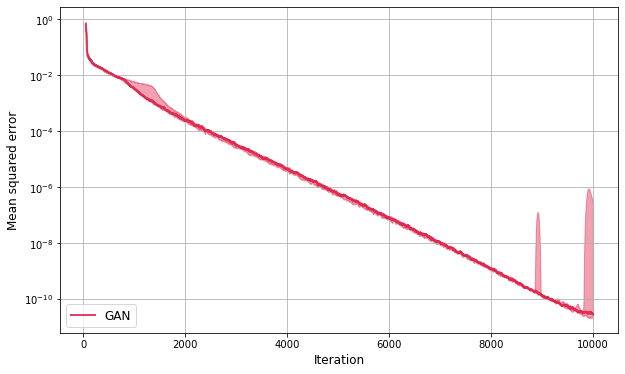

In [13]:
arrs_dict = {"GAN": gan_reps, 
#              "$L_2$": l2_reps,
#              "$L_1$": l1_reps, 
#              "Huber": huber_reps,
#              "RK4": mse*np.ones_like(huber_reps)
            }
ut.plot_reps_results(arrs_dict, fname=None, window=50, figsize=(10,6), pctiles=(2.5,97.5))

In [161]:
print(f"L1 Final Min: {np.min(l1_reps[:, -1])}")
print(f"L2 Final Min: {np.min(l2_reps[:, -1])}")
print(f"Huber Final Min: {np.min(huber_reps[:, -1])}")
print(f"GAN Final Min: {np.min(gan_reps[:, -1])}")

L1 Final Min: 0.1365024596452713
L2 Final Min: 0.009635609574615955
Huber Final Min: 0.004818318877369165
GAN Final Min: 5.329912292767469e-12


# After tuning classical

In [3]:
l2_reps_tuned = np.load('../../experiments/reps/nlo_l2_rand_reps_classical_tuned.npy')
l1_reps_tuned = np.load('../../experiments/reps/nlo_l1_rand_reps_classical_tuned.npy')
huber_reps_tuned = np.load('../../experiments/reps/nlo_huber_rand_reps_classical_tuned.npy')

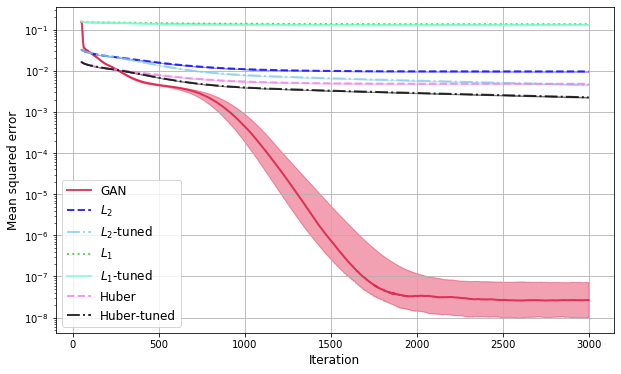

In [6]:
arrs_dict = {"GAN": gan_reps, 
             "$L_2$": l2_reps,
             "$L_2$-tuned": l2_reps_tuned,
             "$L_1$": l1_reps,
             "$L_1$-tuned": l1_reps_tuned,
             "Huber": huber_reps,
             "Huber-tuned": huber_reps_tuned}
ut.plot_reps_results(arrs_dict, fname="nlo_rand_reps_classic_tune.png", figsize=(10,6), window=50)

# Some hypers

In [1]:
from ray.tune import Analysis

In [2]:
# an = Analysis('/Users/dylanrandle/ray_results/gan_tuning_nlo/')
an = Analysis('/Users/dylanrandle/ray_results/classical_tuning_nlo/')

In [3]:
an.dataframe('mean_squared_error', mode='min').sort_values(by='mean_squared_error').head(10)

,mean_squared_error,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,timestamp,...,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config/discriminator,config/generator,config/problem,config/training,logdir
49,0.002300,1108c6d6,299,0.974848,False,NaN,NaN,a3d2c3f434c44710b7e666a5c7c195c5,2020-04-02_15-48-17,1585856897,...,192.168.1.4,294.315594,0,300,"21_d_betas=[0.05011763 0.55380932],d_lr=0.0039...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
92,0.002713,111ece90,299,0.583242,False,NaN,NaN,aa823380458744dc92a4ae93dc66b0f8,2020-04-02_15-54-35,1585857275,...,192.168.1.4,284.318420,0,300,"65_d_betas=[0.55303213 0.73775489],d_lr=0.0039...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
46,0.002762,110fa88e,299,0.961473,False,NaN,NaN,02ad1811071a4286bd1c3c5f8419eb6e,2020-04-02_15-49-43,1585856983,...,192.168.1.4,292.142769,0,300,"32_d_betas=[0.09038878 0.20868441],d_lr=0.0033...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
32,0.002901,111ba6d4,299,0.910077,False,NaN,NaN,8718f4488cb94ac7850dddb1dd74db73,2020-04-02_15-53-59,1585857239,...,192.168.1.4,292.399662,0,300,"58_d_betas=[0.90732964 0.88832865],d_lr=0.0048...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
8,0.003087,11396b4c,299,0.170797,False,NaN,NaN,afc4f4df0bbe47569c50f50ebc842e5a,2020-04-02_15-55-22,1585857322,...,192.168.1.4,129.823966,0,300,"92_d_betas=[0.79452382 0.05647919],d_lr=0.0098...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
25,0.003165,11155540,299,1.049695,False,NaN,NaN,4fbd281ac94d4eb9a5ba2eff1c679f0d,2020-04-02_15-51-14,1585857074,...,192.168.1.4,294.997604,0,300,"44_d_betas=[0.05633205 0.48045044],d_lr=0.0024...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
69,0.003173,111accbe,299,0.987790,False,NaN,NaN,fa3c9188f2494196bfa2d660c183506a,2020-04-02_15-53-45,1585857225,...,192.168.1.4,290.500415,0,300,"56_d_betas=[0.51228458 0.95810216],d_lr=0.0067...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
3,0.003181,11145af0,299,1.006849,False,NaN,NaN,ec25c20219c9411da6816dcfde4f1125,2020-04-02_15-50-51,1585857051,...,192.168.1.4,294.681668,0,300,"42_d_betas=[0.73811145 0.29580572],d_lr=0.0087...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/classical_tunin...
12,0.003645,110c7d80,298,0.866477,False,NaN,NaN,1b359e016b5d4

In [4]:
an.get_best_config('mean_squared_error', mode='min')

{'discriminator': {'activation': 'Tanh',
  'in_dim': 1,
  'n_hidden_layers': 2,
  'n_hidden_units': 20,
  'out_dim': 1,
  'regress': False,
  'residual': True,
  'spectral_norm': True},
 'generator': {'activation': 'Tanh',
  'in_dim': 1,
  'n_hidden_layers': 2,
  'n_hidden_units': 20,
  'out_dim': 1,
  'regress': True,
  'residual': True},
 'problem': {'dx_dt0': 0.5, 'n': 400, 'perturb': True, 't_max': 12.56},
 'training': {'D_iters': 1,
  'G_iters': 1,
  'conditional': False,
  'd1': 1,
  'd2': 1,
  'd_betas': '[0.05011763 0.55380932]',
  'd_lr': 0.003969361013417374,
  'dirname': 'NLO_run_March22_smoothL1',
  'g_betas': '[0.7816786  0.68308922]',
  'g_lr': 0.009864365500106666,
  'gamma': 0.9988731072780002,
  'gp': 0.1,
  'log': False,
  'loss_fn': 'SmoothL1Loss',
  'lr_schedule': True,
  'method': 'unsupervised',
  'niters': 3000,
  'obs_every': 1,
  'plot': False,
  'save': False,
  'seed': 0,
  'wgan': False}}